<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

###  InstitutoTecnológico y de Estudios Superiores de Occidente ###
###  Maestría Ciencia de Datos  ###
###  Modelado Predictivo ###
#  Practical Evaluation: Linear models with output information #

<br>
<br>

* * *

Estudiante: Daniel Nuño <br>
Profesor: Dr. Riemann Ruiz Cruz <br>
Fecha entrega: 25 septiembre, 2022 <br>

* * *

<br>
<br>

In [75]:
<div style="page-break-after: always;"></div>

SyntaxError: invalid syntax (2725851802.py, line 1)

## Intro

This evaluation has the purpose of evaluating the knowledge and reasoning of the results obtained by applying a regression model.

The data set that will be analyzed in this evaluation is related to estimating risk levels based on client variables. The exercises requested in this exam are based on the analysis of a data set, which can be downloaded in 3 parts at the following links:

- Training dataset: [Training dataset](https://iteso01-my.sharepoint.com/:x:/g/personal/riemannruiz_iteso_mx/ERI5N3-vF5JNnt51NaGGJdoBBhUBzMN1hLlHpOcUpj7Ztg?e=ode2M2) (This dataset contains 24 predictor features, and the variable to predict "Audit_Risk", with 200 samples.)

- Test dataset: [Test dataset](https://iteso01-my.sharepoint.com/:x:/g/personal/riemannruiz_iteso_mx/Ec61TH9DEApHptNkJmimIDEBEzQYeB75BJI25iRg7FERFA?e=jGWDB4) (This dataset contains 24 predictor features, and the variable to predict "Audit_Risk", with 100 samples.)

- Unknown dataset: [Unknown dataset](https://iteso01-my.sharepoint.com/:x:/g/personal/riemannruiz_iteso_mx/EcXmaxEBedZJlnXFoN88peABY_MHLiCt8FoxPtftkO210Q?e=1eaKvF) (This dataset contains 50 samples of 24 predictor features without the variable to predict "Audit_Risk".)



For this evaluation, the output variable is 'Audit_Risk', and the remaining variables will be the possible model's input variables.
- Hint: Make sure you can read the three files provided before you start answering the questions. This will save you a bit of time.
- Hint2: You can use the parameter "index_col=0" to read the file so that the index of the data is correct.

Based on the data downloaded, answer the following questions:

In [ ]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import skew

# Modeling Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error,r2_score)
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [76]:
#%% Importing data
Train = pd.read_csv('Audit_train.csv', index_col=0)
Test = pd.read_csv('Audit_test.csv', index_col=0)
Unknown = pd.read_csv('Audit_unknown.csv', index_col=0)

In [77]:
Train.dtypes

Sector_score      float64
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
dtype: object

In [78]:
(Train.isna().sum(), Test.isna().sum(), Unknown.isna().sum())

(Sector_score      0
 PARA_A            0
 Score_A           0
 Risk_A            0
 PARA_B            0
 Score_B           0
 Risk_B            0
 TOTAL             0
 numbers           0
 Score_B.1         0
 Risk_C            0
 Money_Value       0
 Score_MV          0
 Risk_D            0
 District_Loss     0
 PROB              0
 RiSk_E            0
 History           0
 Prob              0
 Risk_F            0
 Score             0
 Inherent_Risk     0
 CONTROL_RISK      0
 Detection_Risk    0
 Audit_Risk        0
 dtype: int64,
 Sector_score      0
 PARA_A            0
 Score_A           0
 Risk_A            0
 PARA_B            0
 Score_B           0
 Risk_B            0
 TOTAL             0
 numbers           0
 Score_B.1         0
 Risk_C            0
 Money_Value       0
 Score_MV          0
 Risk_D            0
 District_Loss     0
 PROB              0
 RiSk_E            0
 History           0
 Prob              0
 Risk_F            0
 Score             0
 Inherent_Risk     

array([[<AxesSubplot:title={'center':'Sector_score'}>,
        <AxesSubplot:title={'center':'PARA_A'}>,
        <AxesSubplot:title={'center':'Score_A'}>,
        <AxesSubplot:title={'center':'Risk_A'}>,
        <AxesSubplot:title={'center':'PARA_B'}>],
       [<AxesSubplot:title={'center':'Score_B'}>,
        <AxesSubplot:title={'center':'Risk_B'}>,
        <AxesSubplot:title={'center':'TOTAL'}>,
        <AxesSubplot:title={'center':'numbers'}>,
        <AxesSubplot:title={'center':'Score_B.1'}>],
       [<AxesSubplot:title={'center':'Risk_C'}>,
        <AxesSubplot:title={'center':'Money_Value'}>,
        <AxesSubplot:title={'center':'Score_MV'}>,
        <AxesSubplot:title={'center':'Risk_D'}>,
        <AxesSubplot:title={'center':'District_Loss'}>],
       [<AxesSubplot:title={'center':'PROB'}>,
        <AxesSubplot:title={'center':'RiSk_E'}>,
        <AxesSubplot:title={'center':'History'}>,
        <AxesSubplot:title={'center':'Prob'}>,
        <AxesSubplot:title={'center':'Risk_F

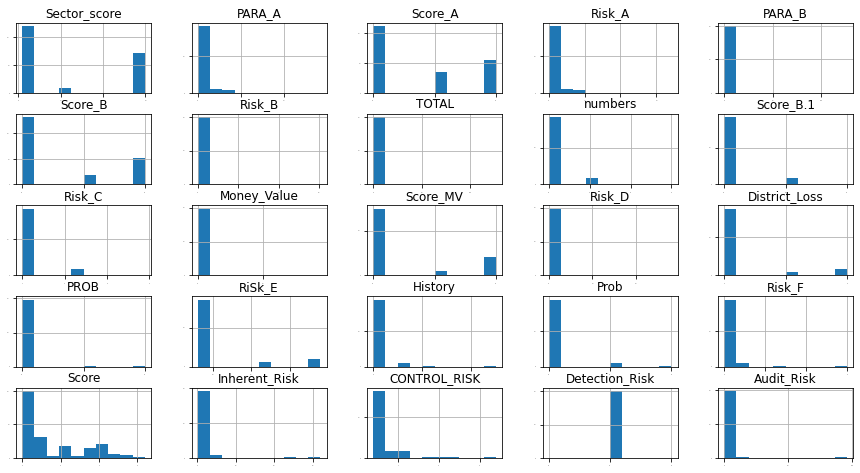

In [79]:
Train.hist(figsize=(15,8), xlabelsize=0, ylabelsize=0)

In [ ]:
(skew(Train, axis=0) >= 1)

array([False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True])

PARA_A, Risk_A, PARA_B, Risk_B, TOTAL, numbers, Score_B.1, Risk_C, Money_Value, Score_MV, Risk_D, District_Loss, PROBB, RiSk_E, History, Prob, Risk_F, Inherent_Risk, CONTROL_RISK, Audit_Risk

In [80]:
Train_clean = Train.drop(columns=['Detection_Risk'])

In [81]:
from scipy import stats
Train_clean = Train_clean[(np.abs(stats.zscore(Train_clean)) < 3).all(axis=1)]

array([[<AxesSubplot:title={'center':'Sector_score'}>,
        <AxesSubplot:title={'center':'PARA_A'}>,
        <AxesSubplot:title={'center':'Score_A'}>,
        <AxesSubplot:title={'center':'Risk_A'}>,
        <AxesSubplot:title={'center':'PARA_B'}>],
       [<AxesSubplot:title={'center':'Score_B'}>,
        <AxesSubplot:title={'center':'Risk_B'}>,
        <AxesSubplot:title={'center':'TOTAL'}>,
        <AxesSubplot:title={'center':'numbers'}>,
        <AxesSubplot:title={'center':'Score_B.1'}>],
       [<AxesSubplot:title={'center':'Risk_C'}>,
        <AxesSubplot:title={'center':'Money_Value'}>,
        <AxesSubplot:title={'center':'Score_MV'}>,
        <AxesSubplot:title={'center':'Risk_D'}>,
        <AxesSubplot:title={'center':'District_Loss'}>],
       [<AxesSubplot:title={'center':'PROB'}>,
        <AxesSubplot:title={'center':'RiSk_E'}>,
        <AxesSubplot:title={'center':'History'}>,
        <AxesSubplot:title={'center':'Prob'}>,
        <AxesSubplot:title={'center':'Risk_F

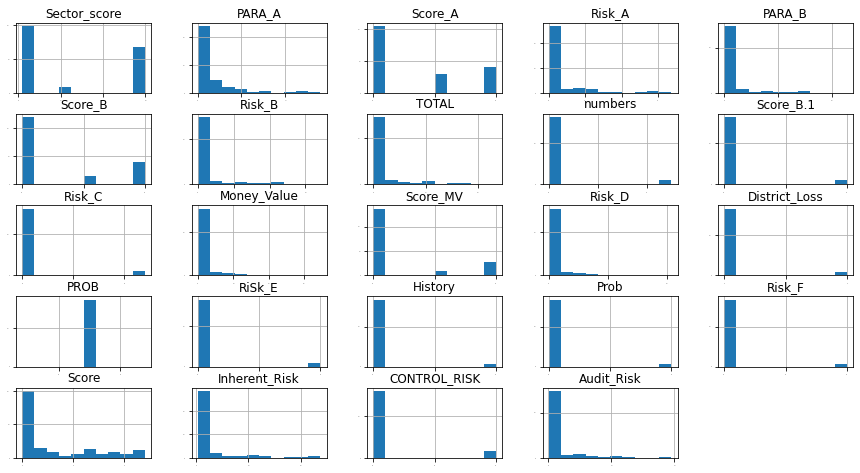

In [82]:
Train_clean.hist(figsize=(15,8), xlabelsize=0, ylabelsize=0)

In [86]:
skew(Train_clean, axis=0)>1

array([False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True])

PARA_A, Risk_A, PARA_B, Risk_B, Score_B, TOTAL, numbers, Score_B.1, Risk_C, Money_Value, Score_MV, Risk_D, District_Loss, RiSk_E, History, Prob, Risk_F, Score, Inherent_Risk, CONTROL_RISK, Audit_Risk

In [85]:
skew(Train, axis=0) >= 1

array([False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True])

In [87]:
Train['PROB'].unique()

array([0.2, 0.4, 0.6])